In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [4]:
def get_lower_and_upper_bounds(series,multiplier):
    iqr = series.quantile(.75) - series.quantile(.25)
    upper = series.quantile(.75)+ iqr*multiplier
    lower = series.quantile(.25)- iqr*multiplier
    return round(lower,2), round(upper,2)

In [5]:
get_lower_and_upper_bounds(df.Temperature,1.5)

(16.7, 104.7)

In [6]:
get_lower_and_upper_bounds(df.Rainfall,1.5)

(0.26, 1.3)

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [7]:
cols = ['Temperature','Rainfall','Flyers','Price','Sales']
for c in cols:
    print(c)
    print(get_lower_and_upper_bounds(df[c],1.5))

Temperature
(16.7, 104.7)
Rainfall
(0.26, 1.3)
Flyers
(4.0, 76.0)
Price
(0.5, 0.5)
Sales
(5.0, 45.0)


In [8]:
df[df['Temperature']<16.7]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [9]:
cols = ['Temperature','Rainfall','Flyers','Price','Sales']

for c in cols:
    lower_outliers = [] 
    upper_outliers = []
    print(c,'\n')
    lower, upper = get_lower_and_upper_bounds(df[c],1.5)
    lower_outliers.append(df[df[c]<lower])
    upper_outliers.append(df[df[c]>upper])
    print('Lower','\n')
    print(pd.concat(lower_outliers),'\n')
    print('Upper')
    print(pd.concat(upper_outliers),'\n','\n')
    

Temperature 

Lower 

         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7 

Upper
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21 
 

Rainfall 

Lower 

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 

Upper
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     F

Temperature of 212 should be removed. Sales should all be kept (July 4th holiday). Negative flyer values should be removed. Rainfall can all be kept.

In [12]:
cols = ['Temperature','Rainfall','Flyers','Price','Sales']

for c in cols:
    lower_outliers = [] 
    upper_outliers = []
    print(c,'\n')
    lower, upper = get_lower_and_upper_bounds(df[c],3)
    lower_outliers.append(df[df[c]<lower])
    upper_outliers.append(df[df[c]>upper])
    print('Lower','\n')
    print(pd.concat(lower_outliers),'\n')
    print('Upper')
    print(pd.concat(upper_outliers),'\n','\n')

Temperature 

Lower 

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 

Upper
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21 
 

Rainfall 

Lower 

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 

Upper
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7 
 

Flyers 

Lower 

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20 

Upper
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: [] 
 

Price 

Lower 

Empt

Temperature of 212 still needs to be removed. Rainfall is good. Negative flyers need removed. Price and Sales are good.

Temperature


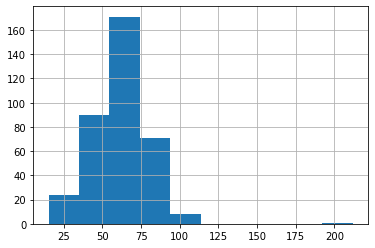

Rainfall


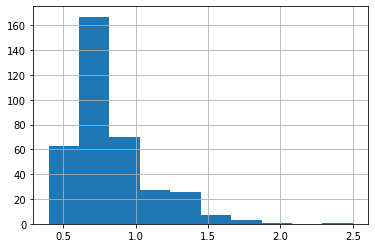

Flyers


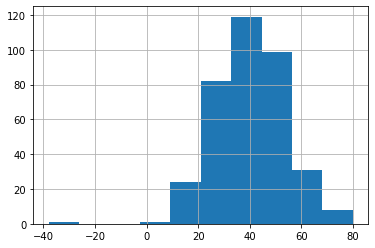

Price


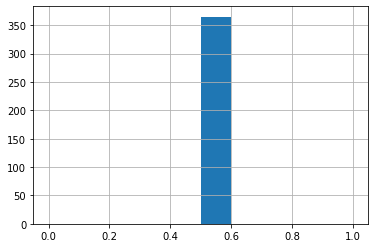

Sales


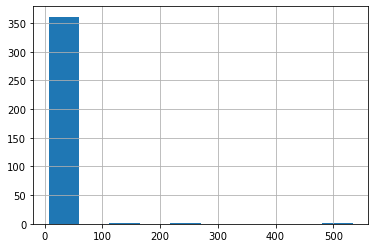

In [16]:
for c in cols:
    print(c)
    df[c].hist()
    plt.show()

Normally Distributed Columns: Flyers, Rainfall, Temperature

In [ ]:
cols = ['flyers','rainfall','temperature']

In [19]:
df['Flyers'].std()

13.786444592187344

In [21]:
def zscore(series):
    return (series-series.mean())/series.std()

In [26]:
cols

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [37]:
def examine_sigmas(series,std):
    temp = pd.DataFrame({series.name:series,'zscore':zscore(series)})
    print(temp[abs(temp.zscore)>=std])

In [38]:
examine_sigmas(df.Temperature,3)

    Temperature    zscore
41        212.0  8.336627


In [36]:
df.Temperature.name

'Temperature'

In [27]:
temp = pd.DataFrame({'temp':df['Temperature'],'zscore':zscore(df['Temperature'])})
temp[abs(temp.zscore)>=2]

,temp,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843
338,22.0,-2.168799
364,15.1,-2.550311


In [28]:
rainfall = pd.DataFrame({'rainfall':df['Rainfall'],'zscore':zscore(df['Rainfall'])})
rainfall[abs(temp.zscore)>=2]

,rainfall,zscore
41,0.91,0.306792
166,0.47,-1.299691
176,0.47,-1.299691
181,0.47,-1.299691
190,0.49,-1.226669
198,0.47,-1.299691
202,0.47,-1.299691
207,0.47,-1.299691
338,1.82,3.629291
364,2.50,6.112037


In [30]:
sales = pd.DataFrame({'sales':df['Sales'],'zscore':zscore(df['Sales'])})
sales[abs(temp.zscore)>=2]

,sales,zscore
41,21,-0.221847
166,41,0.424395
176,42,0.456708
181,143,3.720233
190,40,0.392083
198,41,0.424395
202,42,0.456708
207,43,0.489020
338,10,-0.577281
364,7,-0.674217


In [31]:
flyers = pd.DataFrame({'flyers':df['Flyers'],'zscore':zscore(df['Flyers'])})
flyers[abs(flyers.zscore)>=2]

,flyers,zscore
166,77,2.676244
170,70,2.168499
171,76,2.603709
182,68,2.023429
183,68,2.023429
194,80,2.893849
198,76,2.603709
203,72,2.313569
204,69,2.095964
207,74,2.458639
